In [2]:
!pip install kaggle

In [3]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  m1.jpg  sample_data  wm2.jpg


In [7]:
#importing the dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split



In [8]:
with_mask_files =os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:0])

['with_mask_1894.jpg', 'with_mask_631.jpg', 'with_mask_218.jpg', 'with_mask_2634.jpg', 'with_mask_696.jpg']
[]


In [9]:
without_mask_files =os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5])

['without_mask_2943.jpg', 'without_mask_919.jpg', 'without_mask_2695.jpg', 'without_mask_1026.jpg', 'without_mask_1169.jpg']
without_mask_3743.jpg


In [10]:
print('NUmber of mask images',len(with_mask_files))
print('NUmber of mask images',len(without_mask_files))

NUmber of mask images 3725
NUmber of mask images 3828


In [11]:
#creating the lables for the two class of images
#with mask---> 1
#without mask---> 0
with_mask_labels =[1]*3725
without_mask_labels=[0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [13]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [14]:
labels= with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:0])

7553
[1, 1, 1, 1, 1]
[]


In [15]:
type(labels)

list

<function matplotlib.pyplot.show(close=None, block=None)>

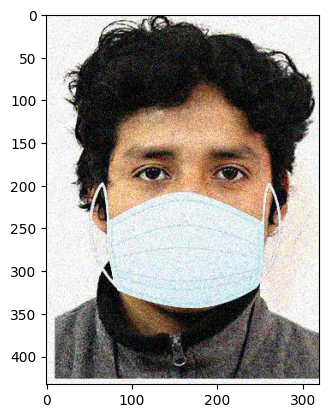

In [16]:
#displaying with mask image
img=mping.imread('/content/data/with_mask/with_mask_1894.jpg')
imgplot=plt.imshow(img)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

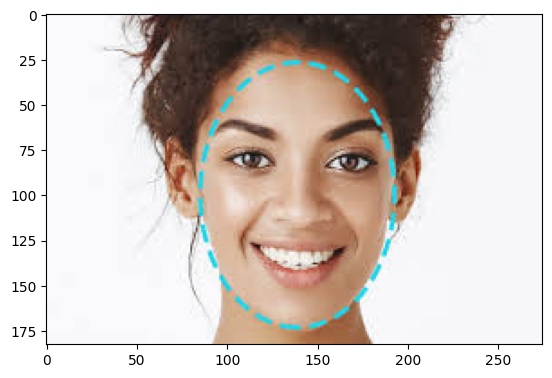

In [17]:
img=mping.imread('/content/data/without_mask/without_mask_2943.jpg')
imgplot=plt.imshow(img)
plt.show

In [18]:
#image proccessing
#1. resize the images
#2. conver images to numpy arrays

In [19]:
with_mask_path='/content/data/with_mask/'#in form of a list
data=[]
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
len(data)

7553

In [21]:
data[0]#pixel values

array([[[246, 246, 246],
        [249, 249, 249],
        [248, 248, 248],
        ...,
        [246, 247, 245],
        [243, 244, 245],
        [246, 248, 249]],

       [[248, 248, 248],
        [240, 240, 240],
        [243, 243, 243],
        ...,
        [246, 245, 244],
        [242, 240, 241],
        [247, 245, 247]],

       [[248, 248, 248],
        [244, 244, 244],
        [246, 246, 246],
        ...,
        [244, 243, 244],
        [245, 243, 244],
        [249, 246, 247]],

       ...,

       [[246, 244, 248],
        [245, 244, 246],
        [242, 243, 244],
        ...,
        [100, 100,  95],
        [ 94,  97,  90],
        [ 98, 103,  95]],

       [[244, 239, 244],
        [239, 236, 239],
        [244, 243, 244],
        ...,
        [217, 211, 212],
        [217, 212, 214],
        [217, 214, 214]],

       [[240, 241, 244],
        [244, 241, 244],
        [241, 242, 244],
        ...,
        [251, 243, 245],
        [252, 245, 250],
        [251, 245, 251]]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
#converting imag list in numpy array
x=np.array(data)
y=np.array(labels)

In [25]:
type(y)

numpy.ndarray

In [26]:
print(x.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.1,random_state=2)

In [28]:
print(x.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6797, 128, 128, 3) (756, 128, 128, 3)


In [29]:
#scalling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255
x_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.01176471, 0.00392157, 0.00392157],
        [0.01176471, 0.00392157, 0.01960784],
        [0.05490196, 0

In [30]:
#bulding a convolutional Network Netorks(CNN)
import tensorflow as tf
from tensorflow import keras

In [31]:
#no of classes
num_of_classes=2
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.1))#dropout to avoid overfitting
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))




In [32]:
#complie the neural networks
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['acc'])

In [33]:
#training the neural netork
history=model.fit(x_train_scaled, y_train, validation_split=0.1,epochs=5)

Epoch 1/5
192/192 [==============================] - 9s 21ms/step - loss: 0.5278 - acc: 0.8329 - val_loss: 0.2877 - val_acc: 0.8838
Epoch 2/5
192/192 [==============================] - 3s 17ms/step - loss: 0.2354 - acc: 0.9040 - val_loss: 0.3290 - val_acc: 0.8735
Epoch 3/5
192/192 [==============================] - 3s 17ms/step - loss: 0.1543 - acc: 0.9387 - val_loss: 0.2284 - val_acc: 0.9059
Epoch 4/5
192/192 [==============================] - 3s 15ms/step - loss: 0.1031 - acc: 0.9609 - val_loss: 0.3417 - val_acc: 0.8941
Epoch 5/5
192/192 [==============================] - 3s 16ms/step - loss: 0.0884 - acc: 0.9683 - val_loss: 0.2613 - val_acc: 0.9103


In [34]:
#model evaluation
loss, accuracy=model.evaluate(x_test_scaled,y_test)
print("test accuracy=",accuracy)

24/24 [==============================] - 0s 10ms/step - loss: 0.2655 - acc: 0.9061
test accuracy= 0.9060846567153931


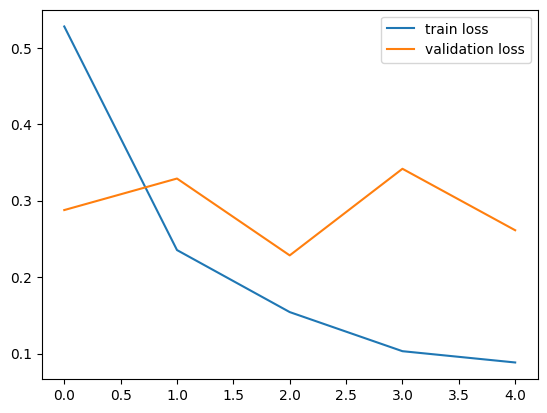

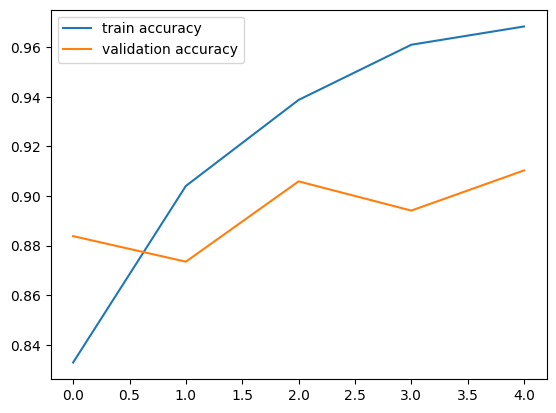

In [35]:
h= history
#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()

path of the image to be predicted :/content/wm2.jpg


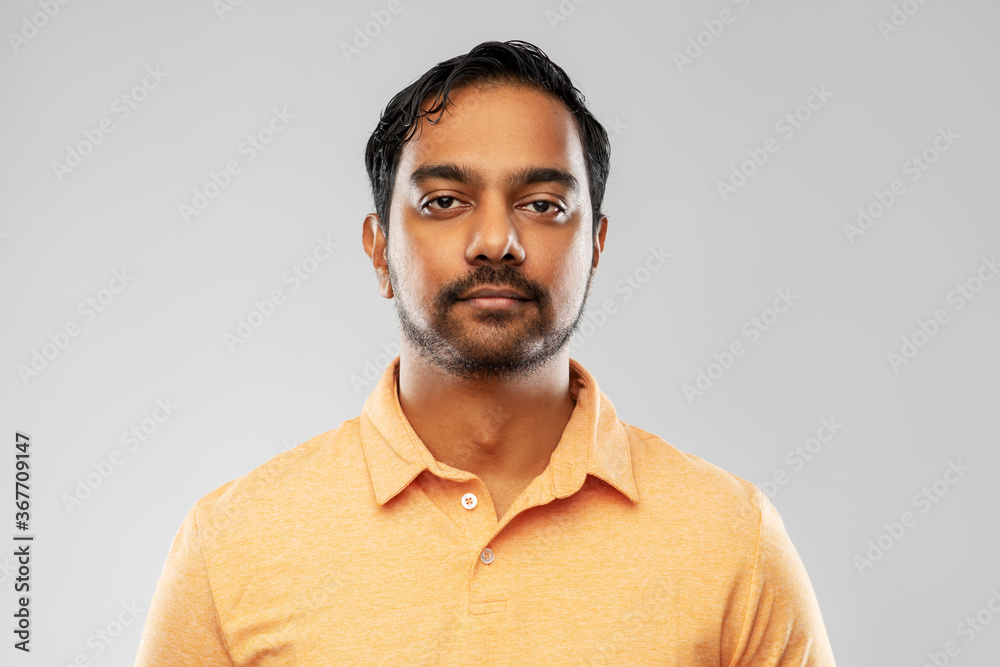

1/1 [==============================] - 0s 28ms/step
[[0.17955585 0.5754713 ]]
1
the person is wearing a mask


In [37]:
#predictive system
input_image_path= input('path of the image to be predicted :')
input_image =cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized= cv2.resize(input_image,(128,128))
input_image_scaled =input_image_resized/255
input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction =model.predict(input_image_reshaped)
print(input_prediction)

input_pred_label=np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label==1:
  print("the person is wearing a mask")
else:
  print("the person is not wearing a mask")